In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns     #plot lib

In [2]:
import warnings     #controls warnings during excecution
warnings.filterwarnings("ignore")     #prevents all warnings
sns.set(style="whitegrid")     #white background to all plots

In [3]:
df = pd.read_csv("AIML Dataset.csv")     #dataframe
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#EXPLORATORY DATA ANALYSIS (EDA)
df.info()     #data types and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df['isFraud'].value_counts()    #8213 frauds

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [6]:
df.shape      #rows & cols

(6362620, 11)

In [7]:
round((df['isFraud'].value_counts()[1] / df.shape[0]) * 100,2)   # % of fraud data

np.float64(0.13)

Text(0, 0.5, 'Count')

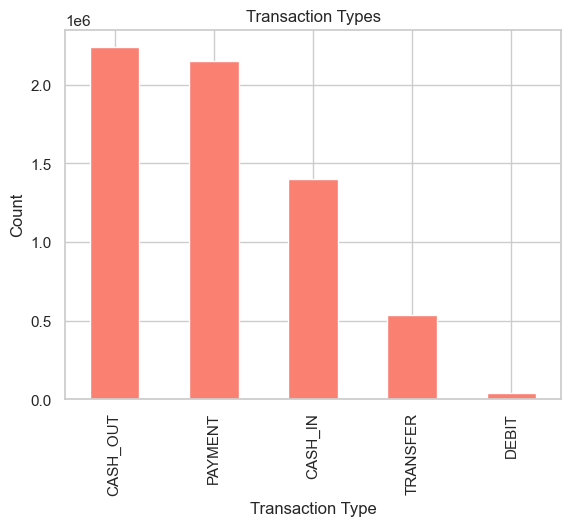

In [8]:
#Type plot
df['type'].value_counts().plot(kind="bar", title="Transaction Types", color="salmon")
plt.xlabel("Transaction Type")
plt.ylabel("Count")

In [11]:
fraud_by_type

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

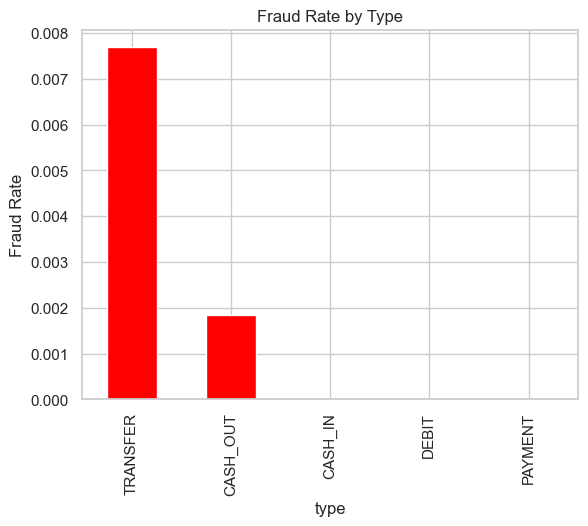

In [10]:
#Fraud by Type plot
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)    #grouping type cols from all over dataset and calculating avg(mean) to plot in descending form
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="red")
plt.ylabel("Fraud Rate")
plt.show()

In [12]:
df['amount'].describe().astype(int)     #amount col statistics

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

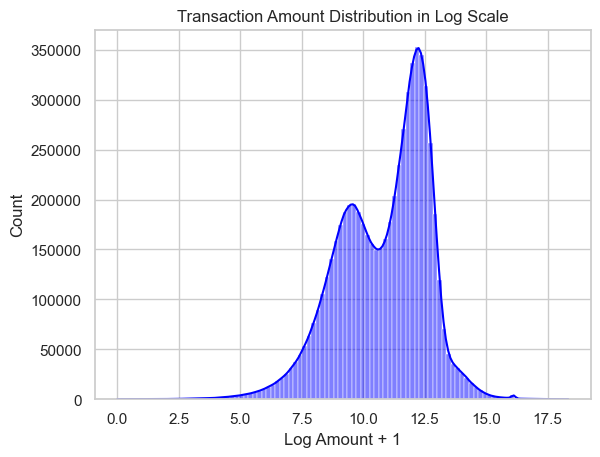

In [13]:
#Amount plot
sns.histplot(np.log1p(df['amount']), bins = 100, kde=True, color="blue")  #log transformations on amount col to handle outliers & divinding data in 100 bins for distribution and Kernel Density Estimation curve
plt.title("Transaction Amount Distribution in Log Scale")
plt.xlabel("Log Amount + 1")    #log1p log scale +1 to avoid log0 errors
plt.show()

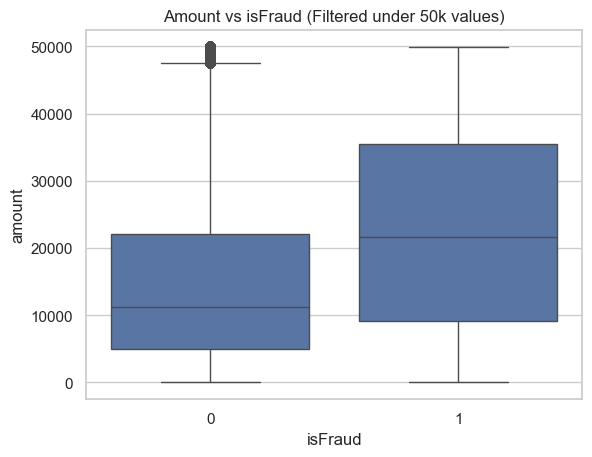

In [14]:
#Fraud & Amount relationship plot
sns.boxplot(data = df[df['amount'] < 50000], x="isFraud", y="amount")
plt.title("Amount vs isFraud (Filtered under 50k values)")
plt.show()

In [15]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [17]:
#Changes in balances 
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['balanceDiffOrig'] < 0    #panda series of value differences

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: balanceDiffOrig, Length: 6362620, dtype: bool

In [18]:
(df['balanceDiffOrig'] < 0).sum()     #balance diff original values less than 0

np.int64(1399253)

In [19]:
(df['balanceDiffDest'] < 0).sum()    #balance diff destination values less than 0

np.int64(1238864)

In [20]:
df.head(1)    #step

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0


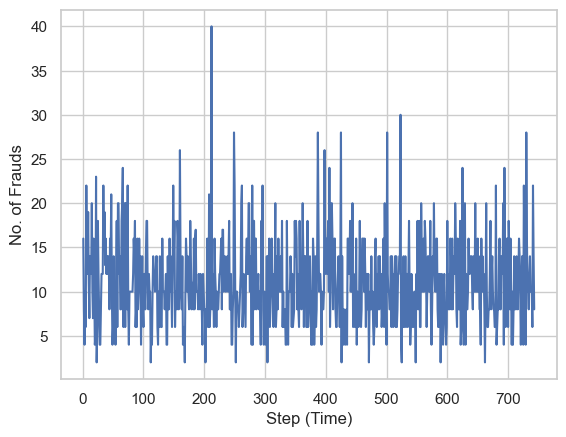

In [21]:
#Fraud_per_step Time series plotting (Fraud at per step)
frauds_per_step = df[df['isFraud']==1] ['step'].value_counts().sort_index()    #Retrieves rows with frauds along with its step(time) tracks its occourance(count) and sorts in order
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per Step")   #plot represents time & no. of frauds in each time step
plt.xlabel("Step (Time)")
plt.ylabel("No. of Frauds")
plt.grid(True)     #Tracks trends & peaks 
plt.show()

In [22]:
#deleting step col as frauds are non dependent to Step
df.drop(columns="step", inplace=True, errors='ignore')    
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [23]:
#10 Highest debiting customers
top_senders = df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [24]:
#10 highest crediting customers
top_receivers = df['nameDest'].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [25]:
#10 highest Fraudelent Customers
fraud_users = df[df['isFraud']==1] ['nameOrig'].value_counts().head(10)   #filters df by fraud senders & keeps it count(occurance) of same fraud sender
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [26]:
#filtering transaction types with most frauds
fraud_types = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

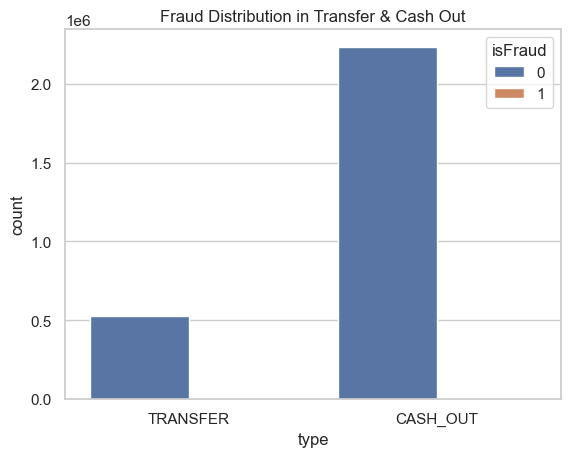

In [27]:
#Fraud types plot
sns.countplot(data=fraud_types, x='type', hue='isFraud')  #Plot for Frauds (isFraud) in Transaction type (type) highlighting frauds in Transactions & Cash out (fraud_type) by Hue
plt.title("Fraud Distribution in Transfer & Cash Out")
plt.show()

In [28]:
#Correlation matrix for df cols using pandas
corr = df[
    ['amount', 'oldbalanceOrg', 'newbalanceOrig',
     'oldbalanceDest', 'newbalanceDest', 'isFraud']
].corr()    #values close to +1 strong +ve relation, 0 no relation & -1 strong -ve relation

corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


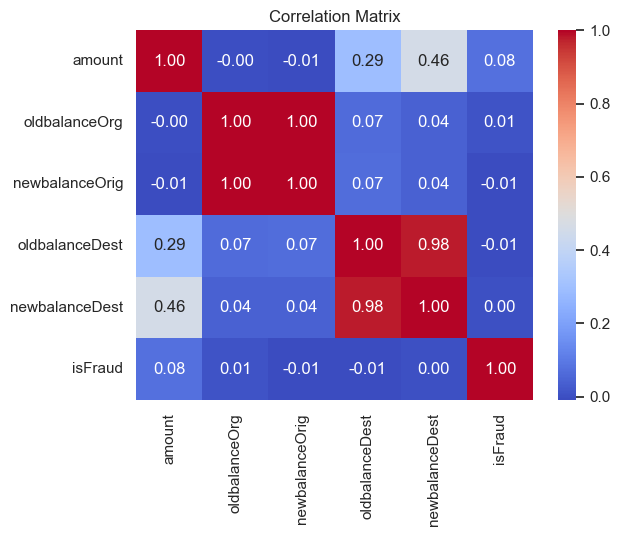

In [29]:
#heatmap plot for corr matrix using seaborn
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')   #heatmap for corr with numerical corr vales(annot) with color scheme(cmap) & format nums with .2 decimal
plt.title("Correlation Matrix")
plt.show()

In [30]:
#Filtering customers in df going 0 balance after Transfer & Cash_Out transaction type
zero_after_transaction = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER','CASH_OUT']))
    ]

In [33]:
len(zero_after_transfer)    #1.1Mil

NameError: name 'zero_after_transfer' is not defined

In [32]:
zero_after_transaction.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [34]:
#FEATURE ENGINEERING
#Feature Selection using scikit-learn
from sklearn.model_selection import train_test_split    #splits data into training & testing sets
from sklearn.preprocessing import StandardScaler     #scaling data
from sklearn.linear_model import LogisticRegression    #modeling
from sklearn.metrics import classification_report, confusion_matrix    #model evaluation 
from sklearn.pipeline import Pipeline     #training & transformation operations
from sklearn.compose import ColumnTransformer     #data transformation
from sklearn.preprocessing import OneHotEncoder    #data transformation

In [35]:
df.head(1)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0


In [36]:
#deleting cols
df_model = df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis = 1)   #axis is direction of df 1 is horizontal direction(column)
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [37]:
#Seperating features(cols) by numeric & non numeric data types
categorical = ['type']    #by OneHotEncoder module
numerical = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']   #by StandardScaler module

In [38]:
#Setting the target / split into features (X) and target (y) so that the model can learn relationships of transaction & fraud 
y = df_model['isFraud']
x = df_model.drop('isFraud', axis=1)

In [39]:
x.shape    #each rows shows 1 transaction

(6362620, 8)

In [40]:
y.shape   #each value show transaction is fraud or not

(6362620,)

In [41]:
#Training & Testing model using train_test_split module
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,stratify=y)    #70% training & 30% testing data

In [42]:
#data preprocessing pipeline & data transformation
preprocessor = ColumnTransformer(    #column-wise preprocessing
    transformers = [      #list of transformations
        ("num", StandardScaler(), numerical),     #converts numeric features into mean=0 & standard deviation=1 for Logistic Regression
        ("cat", OneHotEncoder(drop="first"), categorical)     #Converts categorical text into binary vectors
    ],
    remainder="drop"      #Drops any columns not specified in transformers
)

#ColumnTransformer applies appropriate preprocessing to numerical and categorical features in a single pipeline, for data consistency and leakage.

In [43]:
#ML model pipeline for data preprocessing & model classification
pipeline = Pipeline([      #Ensures steps run in the correct order
    ("prep", preprocessor),       #by ColumnTransformer
    ("clf", LogisticRegression(class_weight="balanced",max_iter=1000))     #supervised learning, binary classification outputs prob. of fraud
])

In [44]:
#model training with preprocessing 
#preprocessing ->(missing values, categorical data, feature scaling, feature selection, class imbalance, outlier handling, train-test split)
pipeline.fit(x_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains spa

In [45]:
#predicting ML model
y_pred = pipeline.predict(x_test)
y_pred      #0 - not fraud, 1 - fraud, shape - size of array elements

array([0, 0, 0, ..., 0, 0, 0], shape=(1908786,))

In [46]:
#Summary model evaluation 
print(classification_report(y_test,y_pred))     #by Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [47]:
#Raw model evaluation
confusion_matrix(y_test, y_pred)    

array([[1802211,  104111],
       [    144,    2320]])

In [48]:
print(f"{pipeline.score(x_test, y_test) * 100:.2f}%")  #accuracy

94.54%


In [49]:
#exporting pipeline for streamlit
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']